In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import cupy as cp
from cupyx.scipy import ndimage
import matplotlib

In [2]:
plt.rcParams['figure.figsize'] = [4, 4]

In [3]:
df1 = pd.read_csv("datasets/round_1/combined/big_df1.csv")

In [4]:
np.min(df1.dx.values)

275.0

In [5]:
mask = np.zeros((9150, 9150))

In [6]:
for x, y in zip(df1.dx.values, df1.dy.values):
    x, y = int(x)+400, int(y)+400
    mask[x-75:x+75, y-75:y+75] = 255

In [91]:
def extract_features(sigma, centroids, pad=1000, org_rad=75):
    overlay_scl = 0.7
    max_coord = int(np.max(centroids))
    min_coord = int(np.min(centroids))
    
    image = np.zeros((max_coord + min_coord + pad*2, max_coord + min_coord + pad*2))
    dCentroids_scaled = centroids+pad
    
    for (c1, c2) in dCentroids_scaled:
        x = int(c2)
        y = int(c1)
        image[x-org_rad:x+org_rad, y-org_rad:y+org_rad] = 255
    plt.imshow(image)
    plt.title("Design Image, Round 1, ID 1")
    plt.show()
    im = cp.array(image)

    im_blur_norm = ndimage.gaussian_filter(im, sigma=sigma, mode = 'constant')
    plt.imshow(im_blur_norm.get())
    plt.title("Gaussian Blur, Sigma 200")
    plt.show()
    #im_blur_norm=im_blur*sigma*cp.sqrt(np.pi)
    print(np.max(im_blur_norm), np.min(im_blur_norm))
    for (c1, c2) in dCentroids_scaled:
        x = int(c2)
        y = int(c1)
        im_blur_norm[x-org_rad:x+org_rad, y-org_rad:y+org_rad] = np.max(im_blur_norm)*overlay_scl
    plt.imshow(im_blur_norm.get())
    plt.title("Gaussian Blur with Design, Sigma 200")
    plt.show()

    sobel = ndimage.gaussian_gradient_magnitude(im, sigma=sigma, mode = 'constant')
    plt.imshow(sobel.get())
    plt.title("Sobel, Sigma 200")
    plt.show()
    print(np.max(sobel), np.min(sobel))
    for (c1, c2) in dCentroids_scaled:
        x = int(c2)
        y = int(c1)
        sobel[x-org_rad:x+org_rad, y-org_rad:y+org_rad] = np.max(sobel)*overlay_scl
    plt.imshow(sobel.get())
    plt.title("Sobel with Design, Sigma 200")
    plt.show()

    laplace = ndimage.gaussian_laplace(im, sigma=sigma, mode = 'constant')
    plt.imshow(laplace.get())
    plt.title("Laplace, Sigma 200")
    plt.show()
    print(np.max(laplace), np.min(laplace))
    for (c1, c2) in dCentroids_scaled:
        x = int(c2)
        y = int(c1)
        laplace[x-org_rad:x+org_rad, y-org_rad:y+org_rad] = np.max(laplace)*overlay_scl
    plt.imshow(laplace.get().astype(np.uint8))
    plt.title("Laplace with Design, Sigma 200")
    plt.show()

    #im_sx = ndimage.sobel(im_blur_norm, axis=1)
    #im_sy = ndimage.sobel(im_blur_norm, axis=0)
    #im_sobel=np.hypot(im_sx, im_sy)
    #plt.imshow(im_sobel.get())
    #plt.show()
    '''
    feats = []
   
    for (c1, c2) in dCentroids_scaled:
        x = int(c2)
        y = int(c1)
        density = np.mean(im_blur_norm[x-org_rad: x+org_rad, y-org_rad: y+org_rad])
        if np.isnan(density):
            print(x,y)
        assert(~np.isnan(density))
        grad = np.mean(im_sobel[x-org_rad: x+org_rad, y-org_rad: y+org_rad])
        assert(~np.isnan(grad))
        feats.append([density.get(), grad.get()])
        
    mempool = cp.get_default_memory_pool()
    pinned_mempool = cp.get_default_pinned_memory_pool()

    mempool.free_all_blocks()
    pinned_mempool.free_all_blocks()

    feats = np.array(feats)
    return feats
    '''

In [14]:
dcoords = np.array(list(zip(df1.dx.values, df1.dy.values)))

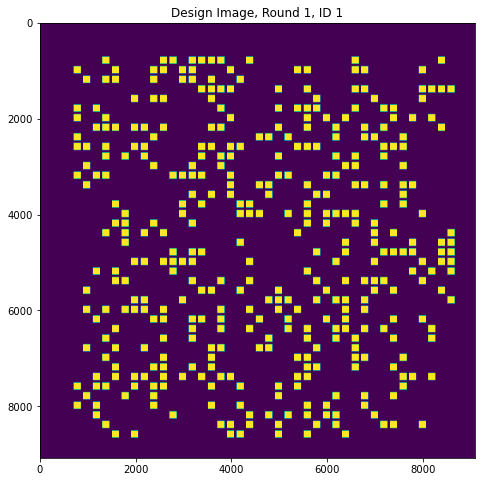

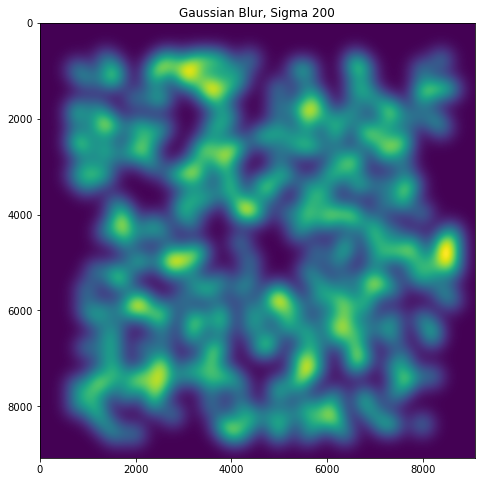

94.57735752507189 0.0


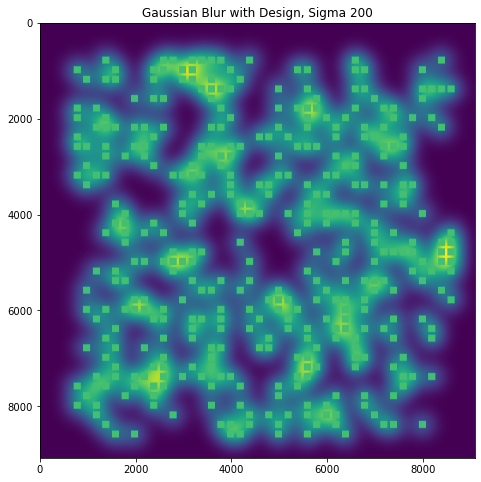

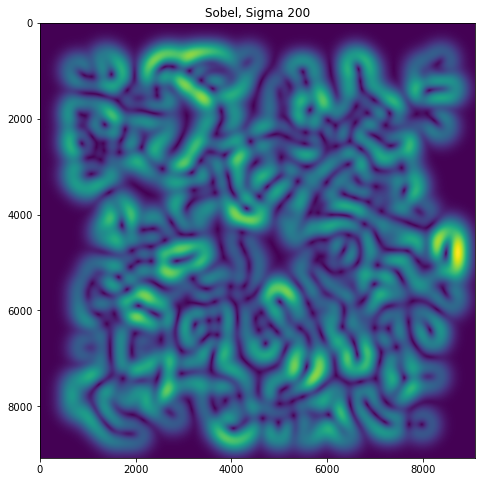

0.24777832702724986 0.0


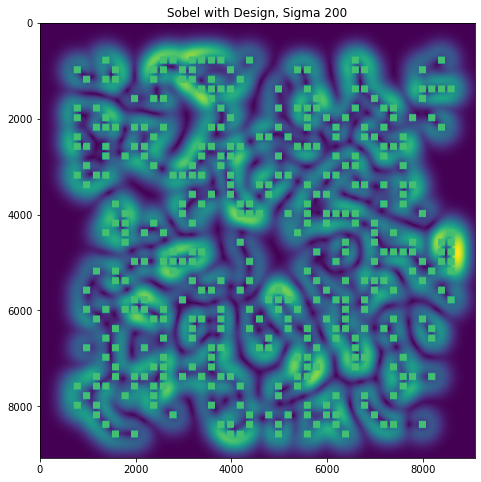

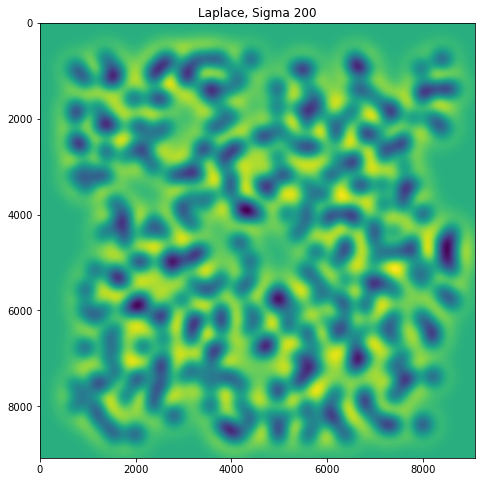

0.0012835302156802481 -0.0021426940878508825


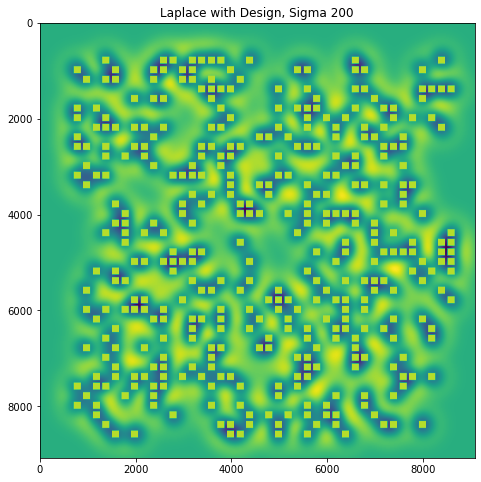

In [57]:
extract_features(200, dcoords, pad=500)

In [ ]:
#for sigma in [50, 100, 150, 200]:
#    extract_features(sigma, dcoords, pad=500)

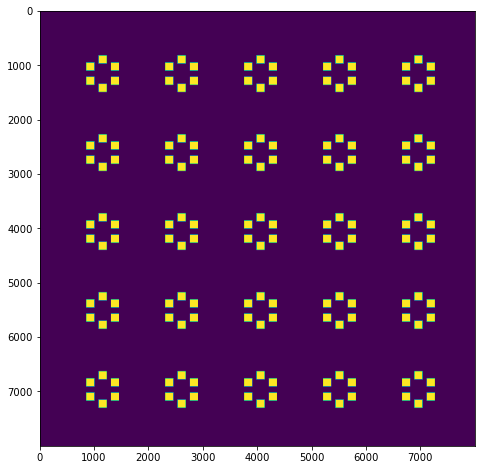

In [7]:
min_dist = int(2*np.sqrt(2)*75+50)
x, y = int(min_dist*np.cos(np.pi/3)), int(min_dist*np.sin(np.pi/3))
width = 2*y+2*150
sy, sx = width+400, width+400
mask = np.zeros((8000,8000))
hex_centroids = []

centroids = []
for j in range(5):
    for i in range(5):
        cy = sy + i*width +i*700
        cx = sy + j*width +j*700
        hex_centroids.append((cy,cx))
        
        
        oy, ox = cy, cx+x+min_dist//2
        oyd, oxd = oy, ox-2*x-min_dist
        oyr, oxr = oy+y, ox-x
        oyl, oxl = oy-y, ox-x
        oyrd, oxrd = oyr, oxr-min_dist
        oyld, oxld = oyl, oxl-min_dist
        rad = 75
        

        #mask[cx-rad//2:cx+rad//2, cy-rad//2:cy+rad//2] = 255
        mask[ox-rad:ox+rad, oy-rad:oy+rad] = 255
        centroids.append((ox, oy))
        mask[oxd-rad:oxd+rad, oyd-rad:oyd+rad] = 255
        centroids.append((oxd, oyd))
        mask[oxr-rad:oxr+rad, oyr-rad:oyr+rad] = 255
        centroids.append((oxr, oyr))
        mask[oxl-rad:oxl+rad, oyl-rad:oyl+rad] = 255
        centroids.append((oxl, oyl))
        mask[oxrd-rad:oxrd+rad, oyrd-rad:oyrd+rad] = 255
        centroids.append((oxrd, oyrd))
        mask[oxld-rad:oxld+rad, oyld-rad:oyld+rad] = 255
        centroids.append((oxld, oyld))

plt.figure(figsize=(8,8))
plt.imshow(mask)
plt.show()

In [63]:
hex_centroids = np.array(centroids)

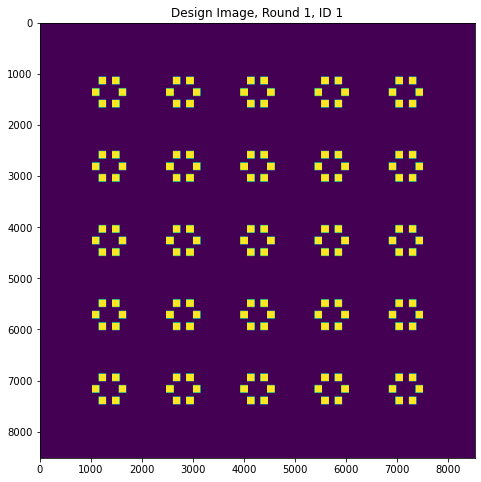

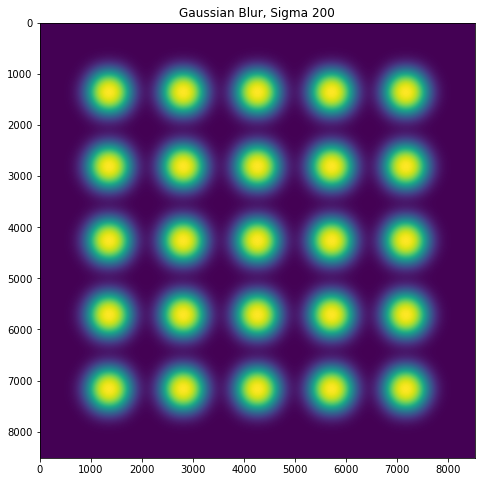

57.852923091455935 0.0


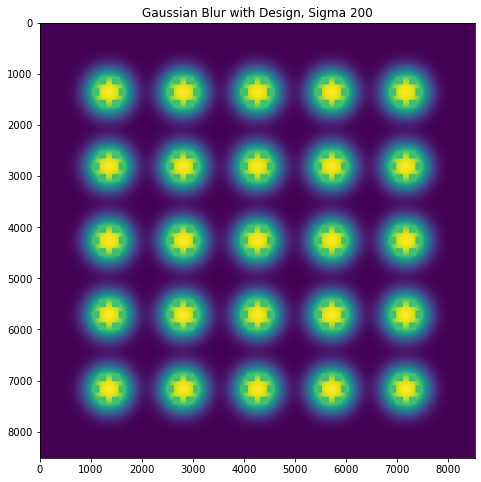

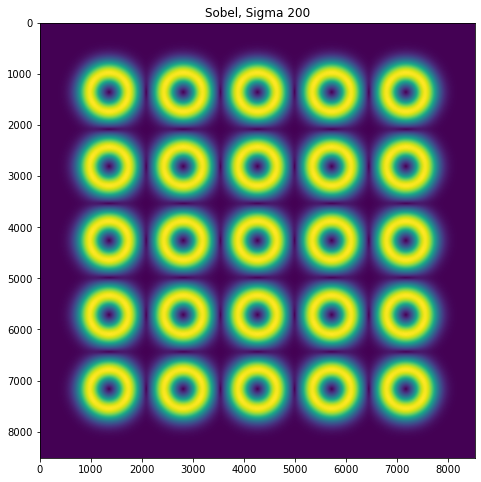

0.13593003100806197 0.0


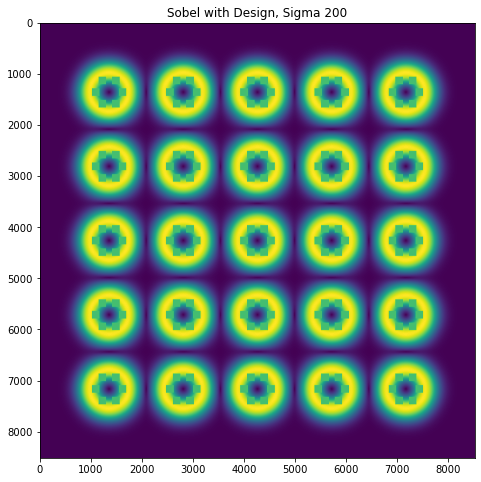

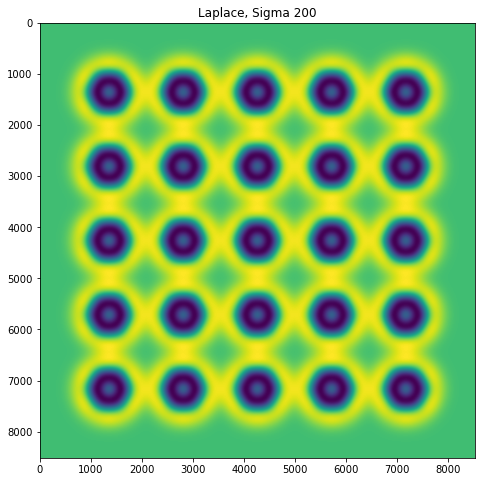

0.00040234612739504486 -0.0009056558898178923


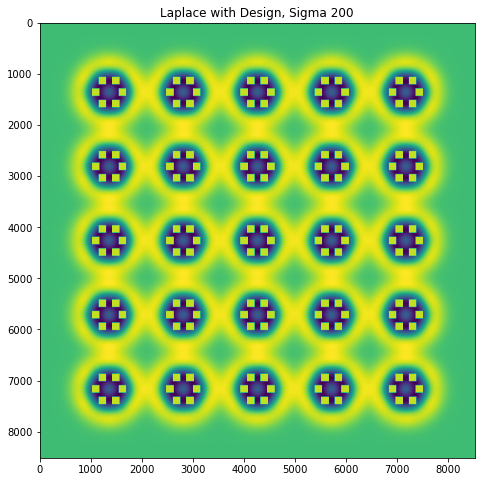

In [69]:
extract_features(200, hex_centroids, pad=200)